In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Checking the Dependent Variable

In [6]:
df.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

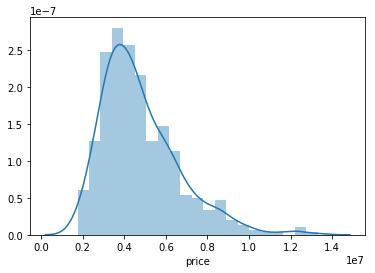

In [5]:
sns.distplot(df.price)

In [7]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

### Getting the categorical columns

In [10]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

### Now applying dummification

**drop_first=True will drop 1 column and that will be based alphabetial order and hence in Yes or No, No will be dropped**

In [11]:
dfc = pd.get_dummies(data=df,columns=categorical_cols,drop_first=True)
dfc.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


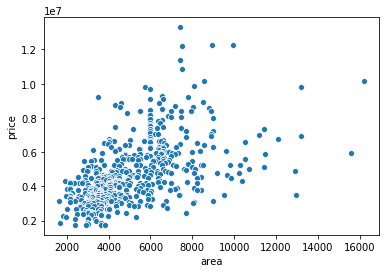

In [13]:
sns.scatterplot(df.area,df.price)

In [14]:
x = dfc.drop('price',axis=1)
y = dfc.price

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Linear Regression using Stats

In [25]:
import statsmodels.api as sm

C:\Users\KUS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [28]:
x_const_train = sm.add_constant(x_train)
x_const_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_const_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.00e-85
Time:                        12:34:12   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            9.578e+04   2.97e+05      0.322      0.748   -4.89e+05    6.81e+05
area                              253.2873     27.086      9.351      0.000     200.024     306.551
bedrooms                         8.089e+04   8.11e+04      0.998      0.319   -7.85e+04     2.4e+05
bathrooms                        1.115e+06   1.23e+05      9.031      0.000    8.72e+05    1.36e+06
stories                          4.173e+05   7.45e+04      5.599      0.000    2.71e+05    5.64e+05
parking                          3.031e+05   6.67e+04      4.547      0.000    1.72e+05    4.34e+05
mainroad_yes                     4.081e+05   1.62e+05      2.517      0.012    8.93e+04    7.27e+05
guestroom_yes                    2.757e+05   1.48e+05      1.858      0.064   -1.61e+04    5.68e+05
basement_yes                     4.826e+05   1.27e+05      3.794      0.000    2.32e+05    7.33e+05
hotwaterheating_yes              6.164e+05   2.35e+05      2.619      0.009    1.54e+05    1.08e+06
airconditioning_yes              6.858e+05   1.25e+05      5.502      0.000    4.41e+05    9.31e+05
prefarea_yes                     5.092e+05    1.3e+05      3.925      0.000    2.54e+05    7.64e+05
furnishingstatus_semi-furnished -1.217e+05   1.29e+05     -0.941      0.347   -3.76e+05    1.33e+05
furnishingstatus_unfurnished    -3.912e+05   1.43e+05     -2.741      0.006   -6.72e+05   -1.11e+05
==============================================================================
Omnibus:                       61.032   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.413
Skew:                           0.805   Prob(JB):                     4.38e-32
Kurtosis:                       5.550   Cond. No.                     3.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Note**

1. Here R-Square of 69.3% shows that 69.3% **VARIATION** in price is explained by independent variables
2. Here Ajusted R-Square of 68.2%. The problem of R-square is as we add features, the r-square increases irrespective of quality of the feature. So for every bad feature, adjusted r quares adjusts the r square value.
3. F-statistic (63.79) -- It tests the hypothesis of the **worthyness of model as a whole**. -- (should we throw the model or keep it)
    1. Formula -- (Mean Sum of Square of Regression)/(Mean Sum of Square of Error)
    2. Here the hypothesis is that H0: beta1 = beta2 = beta3 = 0 and Ha: vice versa.
4. F-stat-prob - (1*10e-85) (area ouside of 63.79 in F distribution) -- is the probability of getting the F value > 63.79% when H0 is true.

**P Values**

H0 : Beta = 0
Ha : Beta != 0
    
To reject H0, the p value has to be less than 0.05 for 95% CI

Remove the features one by one as p value changes every time.

1. For Bedroom p val is 0.3 hence H0 holds. And that means Bedroom is not influencing the price.
2. For Guestroom_yes p val is 0.06. Hence we remove this as well.
3. For furnishingstatus_semi-furnished p val is 0.34. Hence we remove this feature as well.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[8.27644693062682,
 16.652386532494006,
 9.417642946093611,
 7.880729565311669,
 1.9863996211941708,
 6.884806136866402,
 1.4732335889660533,
 2.0198579967690864,
 1.0915678245324942,
 1.767753041617226,
 1.4942108584721139,
 2.3868314364815126,
 2.008632372569909]

In [35]:
vif = pd.DataFrame({'vif':vif,'features':x.columns})

In [37]:
vif

,vif,features
0,8.276447,area
1,16.652387,bedrooms
2,9.417643,bathrooms
3,7.880730,stories
4,1.986400,parking
5,6.884806,mainroad_yes
6,1.473234,guestroom_yes
7,2.019858,basement_yes
8,1.091568,hotwaterheating_yes
9,1.767753,airconditioning_yes


**Note**

Here Bedrooms and Bathrooms are correlated and from the OLS model bedroom is not significant ... But predicting a price of house without rooms is illogical and hence we will drop bathrooms.

In [39]:
x_train1 = x_train.drop('bathrooms',axis=1)
x_test1 = x_test.drop('bathrooms',axis=1)
#x_const_train = sm.add_constant(x_train)
#x_const_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     638.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          2.53e-238
Time:                        14:29:01   Log-Likelihood:                -5837.0
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     369   BIC:                         1.175e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                              297.7019     28.758     10.352      0.000     241.152     354.252
bedrooms                         3.526e+05   7.09e+04      4.975      0.000    2.13e+05    4.92e+05
stories                          5.734e+05   7.99e+04      7.176      0.000    4.16e+05    7.31e+05
parking                          3.312e+05   7.36e+04      4.499      0.000    1.86e+05    4.76e+05
mainroad_yes                     4.668e+05   1.62e+05      2.885      0.004    1.49e+05    7.85e+05
guestroom_yes                    2.428e+05   1.64e+05      1.480      0.140   -7.98e+04    5.65e+05
basement_yes                     6.425e+05   1.38e+05      4.646      0.000    3.71e+05    9.15e+05
hotwaterheating_yes              6.869e+05    2.6e+05      2.639      0.009    1.75e+05     1.2e+06
airconditioning_yes              7.013e+05   1.37e+05      5.113      0.000    4.32e+05    9.71e+05
prefarea_yes                     4.181e+05   1.43e+05      2.926      0.004    1.37e+05    6.99e+05
furnishingstatus_semi-furnished -2.295e+04   1.34e+05     -0.172      0.864   -2.86e+05     2.4e+05
furnishingstatus_unfurnished    -3.047e+05   1.42e+05     -2.148      0.032   -5.84e+05   -2.57e+04
==============================================================================
Omnibus:                       50.601   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.452
Skew:                           0.749   Prob(JB):                     1.14e-21
Kurtosis:                       4.957   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
vif = [variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif

[7.977868478363449,
 14.541281250776196,
 7.778111867721856,
 1.9322193456127768,
 7.030340683924869,
 1.5594525602114955,
 2.138417096337224,
 1.1057795356482654,
 1.8574347489263607,
 1.4998209391356436,
 2.3747952648525024,
 1.9378849251840056]

In [41]:
vif = pd.DataFrame({'vif':vif,'features':x_train1.columns})
vif

,vif,features
0,7.977868,area
1,14.541281,bedrooms
2,7.778112,stories
3,1.932219,parking
4,7.030341,mainroad_yes
5,1.559453,guestroom_yes
6,2.138417,basement_yes
7,1.105780,hotwaterheating_yes
8,1.857435,airconditioning_yes
9,1.499821,prefarea_yes


## Now dropping out furnishingstatus_semi-furnished and guestroom_yes based on p values

In [42]:
x_train1 = x_train.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes'],axis=1)
x_test1 = x_test.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes'],axis=1)
#x_const_train = sm.add_constant(x_train)
#x_const_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     765.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          1.00e-240
Time:                        14:34:50   Log-Likelihood:                -5838.1
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     371   BIC:                         1.174e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           302.6242     28.487     10.623      0.000     246.607     358.641
bedrooms                      3.392e+05   6.74e+04      5.031      0.000    2.07e+05    4.72e+05
stories                        5.88e+05   7.93e+04      7.412      0.000    4.32e+05    7.44e+05
parking                       3.255e+05   7.34e+04      4.432      0.000    1.81e+05     4.7e+05
mainroad_yes                  4.598e+05   1.61e+05      2.862      0.004    1.44e+05    7.76e+05
basement_yes                  7.193e+05   1.28e+05      5.618      0.000    4.68e+05    9.71e+05
hotwaterheating_yes           6.729e+05    2.6e+05      2.586      0.010    1.61e+05    1.18e+06
airconditioning_yes           7.142e+05   1.36e+05      5.259      0.000    4.47e+05    9.81e+05
prefarea_yes                  4.354e+05   1.42e+05      3.057      0.002    1.55e+05    7.15e+05
furnishingstatus_unfurnished -3.049e+05   1.21e+05     -2.519      0.012   -5.43e+05   -6.69e+04
==============================================================================
Omnibus:                       49.224   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.907
Skew:                           0.739   Prob(JB):                     1.10e-20
Kurtosis:                       4.899   Cond. No.                     2.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
vif = [variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif = pd.DataFrame({'vif':vif,'features':x_train1.columns})
vif

,vif,features
0,7.823598,area
1,13.155140,bedrooms
2,7.660882,stories
3,1.922006,parking
4,6.927763,mainroad_yes
5,1.831682,basement_yes
6,1.104313,hotwaterheating_yes
7,1.819799,airconditioning_yes
8,1.488747,prefarea_yes
9,1.410550,furnishingstatus_unfurnished


In [44]:
x_train1.corr()

,area,bedrooms,stories,parking,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
area,1.000000,0.150933,0.069115,0.322459,0.296792,0.039259,0.001753,0.230055,0.210699,-0.124330
bedrooms,0.150933,1.000000,0.415340,0.136585,-0.032378,0.085510,0.028803,0.225595,0.055724,-0.121150
stories,0.069115,0.415340,1.000000,0.038438,0.085811,-0.204091,0.032190,0.329484,-0.009994,-0.107335
parking,0.322459,0.136585,0.038438,1.000000,0.171942,0.021634,0.093102,0.175432,0.109114,-0.135628
mainroad_yes,0.296792,-0.032378,0.085811,0.171942,1.000000,0.042987,-0.009268,0.106985,0.221095,-0.130545
basement_yes,0.039259,0.085510,-0.204091,0.021634,0.042987,1.000000,-0.029223,0.099756,0.239992,-0.135212
hotwaterheating_yes,0.001753,0.028803,0.032190,0.093102,-0.009268,-0.029223,1.000000,-0.135291,-0.047778,-0.055849
airconditioning_yes,0.230055,0.225595,0.329484,0.175432,0.106985,0.099756,-0.135291,1.000000,0.085179,-0.103340
prefarea_yes,0.210699,0.055724,-0.009994,0.109114,0.221095,0.239992,-0.047778,0.085179,1.000000,-0.091865
furnishingstatus_unfurnished,-0.124330,-0.121150,-0.107335,-0.135628,-0.130545,-0.135212,-0.055849,-0.103340,-0.091865,1.000000


## Stories and bedroom have high correlation and hence we decide to drop stories

## All this is happening beacuse in the OLS summary the cond.No value has to be near 10 ... its too high ...

In [45]:
x_train1 = x_train.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes','stories'],axis=1)
x_test1 = x_test.drop(['bathrooms','furnishingstatus_semi-furnished','guestroom_yes','stories'],axis=1)
#x_const_train = sm.add_constant(x_train)
#x_const_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     737.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          4.65e-231
Time:                        14:39:10   Log-Likelihood:                -5864.4
No. Observations:                 381   AIC:                         1.175e+04
Df Residuals:                     372   BIC:                         1.178e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           295.1452     30.464      9.688      0.000     235.242     355.048
bedrooms                      6.531e+05   5.61e+04     11.633      0.000    5.43e+05    7.63e+05
parking                       2.783e+05   7.83e+04      3.555      0.000    1.24e+05    4.32e+05
mainroad_yes                   6.82e+05   1.69e+05      4.037      0.000     3.5e+05    1.01e+06
basement_yes                   4.42e+05   1.31e+05      3.373      0.001    1.84e+05       7e+05
hotwaterheating_yes           8.068e+05   2.78e+05      2.905      0.004    2.61e+05    1.35e+06
airconditioning_yes           1.011e+06   1.39e+05      7.285      0.000    7.38e+05    1.28e+06
prefarea_yes                  4.304e+05   1.52e+05      2.824      0.005    1.31e+05     7.3e+05
furnishingstatus_unfurnished -3.459e+05   1.29e+05     -2.673      0.008      -6e+05   -9.14e+04
==============================================================================
Omnibus:                       29.181   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.938
Skew:                           0.573   Prob(JB):                     2.13e-09
Kurtosis:                       4.096   Cond. No.                     2.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
vif = [variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])]
vif = pd.DataFrame({'vif':vif,'features':x_train1.columns})
vif

,vif,features
0,7.813783,area
1,7.965627,bedrooms
2,1.907615,parking
3,6.686823,mainroad_yes
4,1.675253,basement_yes
5,1.098991,hotwaterheating_yes
6,1.661204,airconditioning_yes
7,1.488713,prefarea_yes
8,1.407609,furnishingstatus_unfurnished


## We stop here as all the VIF values have come under 10.

## Linear Regression using Sklearn

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [59]:
LR.score(x_test,y_test)

0.6463350878895876

In [60]:
from sklearn import metrics

In [61]:
mse = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mse)
RMSE

1234106.749637685

**Note**

We tried to transform the price (log) to check if accuracy may be improved, but there was no significant improvement hence we go ahead with feature selection.

# RFE for Feature Selection

In [64]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
params = [{'n_features_to_select':list(range(1,14))}]

LR = LinearRegression()
rfe = RFE(LR)
model_cv = GridSearchCV(estimator=rfe,param_grid=params,scoring='r2',cv=3,return_train_score=True)

model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [65]:
model_cv.best_params_

{'n_features_to_select': 13}

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.214679,0.271781,0.003000,1.414223e-03,1,{'n_features_to_select': 1},0.325055,0.108476,0.273291,0.235607,0.092346,13,0.227110,0.324117,0.277423,0.276217,0.039612
1,0.018001,0.000817,0.002333,4.713704e-04,2,{'n_features_to_select': 2},0.419905,0.203398,0.342257,0.321853,0.089558,12,0.371813,0.399295,0.433467,0.401525,0.025220
2,0.017668,0.000943,0.002000,1.123916e-07,3,{'n_features_to_select': 3},0.428958,0.405970,0.403771,0.412900,0.011390,11,0.385776,0.470336,0.489815,0.448643,0.045159
3,0.016334,0.000943,0.002333,4.714266e-04,4,{'n_features_to_select': 4},0.475190,0.475172,0.414235,0.454865,0.028730,10,0.452107,0.503708,0.502272,0.486029,0.023994
4,0.019001,0.000816,0.002000,0.000000e+00,5,{'n_features_to_select': 5},0.471831,0.490301,0.440338,0.467490,0.020627,9,0.496322,0.523001,0.556756,0.525360,0.024728


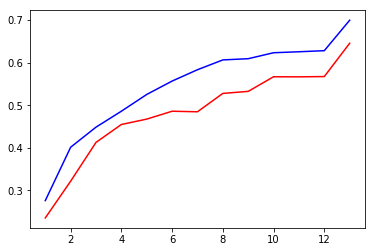

In [72]:
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_test_score'],color='r')
plt.plot(cv_results['param_n_features_to_select'],cv_results['mean_train_score'],color='b')

In [76]:
from sklearn.metrics import r2_score
n_features = 10
rfe = RFE(LR,n_features_to_select=n_features)
rfe = rfe.fit(x_train,y_train)

y_pred = rfe.predict(x_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.6028024741762792


In [77]:
cols = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),
                   columns=['cols','select','rank'])
cols

,cols,select,rank
0,area,False,4
1,bedrooms,False,3
2,bathrooms,True,1
3,stories,True,1
4,parking,True,1
5,mainroad_yes,True,1
6,guestroom_yes,True,1
7,basement_yes,True,1
8,hotwaterheating_yes,True,1
9,airconditioning_yes,True,1


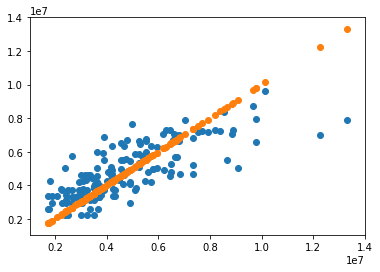

In [80]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)

# Very Important

**VIF**

1. Each feature will now become target and linear regression is performed and r2 score is calculated.
2. VIF = 1-r2score for each feature
3. VIF of more than 10 is not acceptable.

# Lasso and Ridge

In [81]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,ElasticNetCV

In [82]:
LR = LinearRegression()
ls = Lasso()
LR.fit(x_train,y_train)
ls.fit(x_train,y_train)
y_p_LR = LR.predict(x_test)
y_p_ls = ls.predict(x_test)

In [83]:
ls.score(x_test,y_test)

0.6463346704905588

In [84]:
LR.score(x_test,y_test)

0.6463350878895876

In [85]:
ls.coef_

array([ 2.53288472e+02,  8.08925896e+04,  1.11474763e+06,  4.17268707e+05,
        3.03111289e+05,  4.08066107e+05,  2.75705568e+05,  4.82603008e+05,
        6.16353623e+05,  6.85835170e+05,  5.09188135e+05, -1.21643653e+05,
       -3.91183281e+05])

In [86]:
ls.intercept_

95786.77973843087

In [89]:
pd.DataFrame(list(zip(x_train.columns,ls.coef_)),columns=['Features','Coeffs'])

,Features,Coeffs
0,area,2.532885e+02
1,bedrooms,8.089259e+04
2,bathrooms,1.114748e+06
3,stories,4.172687e+05
4,parking,3.031113e+05
5,mainroad_yes,4.080661e+05
6,guestroom_yes,2.757056e+05
7,basement_yes,4.826030e+05
8,hotwaterheating_yes,6.163536e+05
9,airconditioning_yes,6.858352e+05


In [93]:
ls10 = Lasso(alpha=10)
ls10.fit(x_train,y_train)
y_p_ls10 = ls10.predict(x_test)

In [95]:
ls10.score(x_test,y_test)

0.6463309126388551

In [109]:
ls000001 = Lasso(alpha=0.00001)
ls000001.fit(x_train,y_train)
y_p_ls0001 = ls0001.predict(x_test)

In [111]:
ls000001.score(x_test,y_test)

0.6463350878854139

In [112]:
ls000001.coef_

array([ 2.53287252e+02,  8.08931413e+04,  1.11475118e+06,  4.17267580e+05,
        3.03111236e+05,  4.08073682e+05,  2.75710533e+05,  4.82603522e+05,
        6.16375423e+05,  6.85839346e+05,  5.09192089e+05, -1.21652663e+05,
       -3.91191241e+05])

In [113]:
pd.DataFrame(list(zip(x_train.columns,ls000001.coef_)),columns=['Features','Coeffs'])

,Features,Coeffs
0,area,2.532873e+02
1,bedrooms,8.089314e+04
2,bathrooms,1.114751e+06
3,stories,4.172676e+05
4,parking,3.031112e+05
5,mainroad_yes,4.080737e+05
6,guestroom_yes,2.757105e+05
7,basement_yes,4.826035e+05
8,hotwaterheating_yes,6.163754e+05
9,airconditioning_yes,6.858393e+05


In [120]:
ls100000 = Lasso(alpha=100000)
ls100000.fit(x_train,y_train)
y_p_ls100000 = ls100000.predict(x_test)

In [121]:
ls100000.coef_

array([ 3.49392154e+02,  5.92455754e+04,  7.61966201e+05,  4.32661293e+05,
        2.40144756e+05,  0.00000000e+00,  0.00000000e+00,  3.27891486e+05,
        0.00000000e+00,  3.33101652e+05,  8.37783335e+04,  0.00000000e+00,
       -3.25647509e+04])

In [122]:
pd.DataFrame(list(zip(x_train.columns,ls100000.coef_)),columns=['Features','Coeffs'])

,Features,Coeffs
0,area,349.392154
1,bedrooms,59245.575433
2,bathrooms,761966.201405
3,stories,432661.292851
4,parking,240144.755734
5,mainroad_yes,0.000000
6,guestroom_yes,0.000000
7,basement_yes,327891.485777
8,hotwaterheating_yes,0.000000
9,airconditioning_yes,333101.651646


# Ridge

In [123]:
ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)

In [124]:
ridge.score(x_test,y_test)

0.6457927843743896

In [125]:
pd.DataFrame(list(zip(x_train.columns,ridge.coef_)),columns=['Features','Coeffs'])

,Features,Coeffs
0,area,2.548261e+02
1,bedrooms,8.455633e+04
2,bathrooms,1.099963e+06
3,stories,4.193109e+05
4,parking,3.043556e+05
5,mainroad_yes,3.998649e+05
6,guestroom_yes,2.740628e+05
7,basement_yes,4.812783e+05
8,hotwaterheating_yes,5.823741e+05
9,airconditioning_yes,6.761131e+05


In [135]:
ridge = Ridge(alpha=)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)

In [136]:
ridge.score(x_test,y_test)

0.6462812813242444

In [137]:
pd.DataFrame(list(zip(x_train.columns,ridge.coef_)),columns=['Features','Coeffs'])

,Features,Coeffs
0,area,2.534433e+02
1,bedrooms,8.126434e+04
2,bathrooms,1.113253e+06
3,stories,4.174819e+05
4,parking,3.032439e+05
5,mainroad_yes,4.072344e+05
6,guestroom_yes,2.755412e+05
7,basement_yes,4.824786e+05
8,hotwaterheating_yes,6.128026e+05
9,airconditioning_yes,6.848393e+05


## Useful when the model is overfit ... Here that is not the case.